# 회귀분석 - 평균으로 돌아간다.

In [1]:
# 보스턴 집값 데이터로 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")

In [4]:
data

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.corr()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
"25,000평방피트초과",-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
비소매상업지역비율,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
찰스강경계,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
농축 일산화질소,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
가구당평균방수,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
1940년이전건축비율,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
직업센터접근성,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
도로접근성,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
재산세율,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

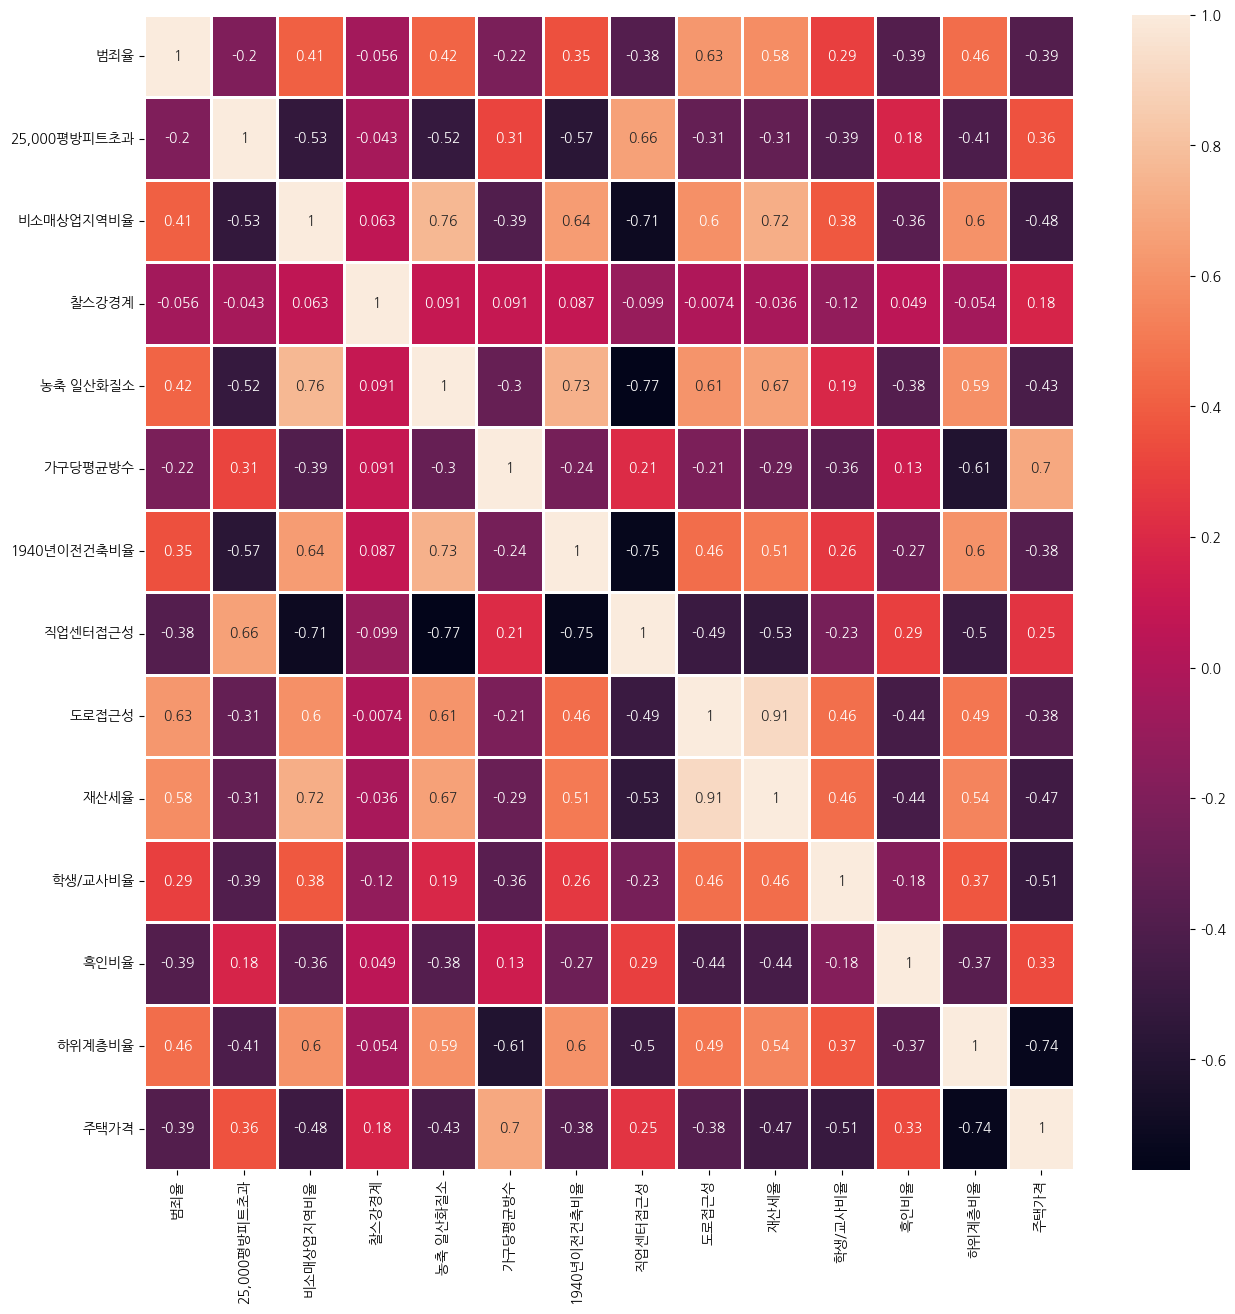

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linecolor='white', linewidth=1)

<Axes: xlabel='하위계층비율', ylabel='주택가격'>

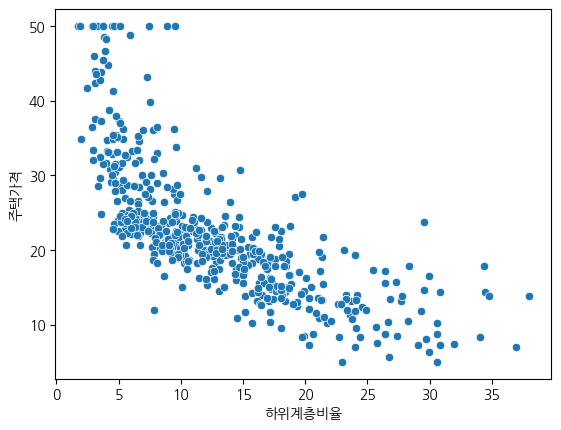

In [8]:
sns.scatterplot(data=data['주택가격'], x=data['하위계층비율'], y=data['주택가격'])

In [9]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: xlabel='1940년이전건축비율', ylabel='농축 일산화질소'>

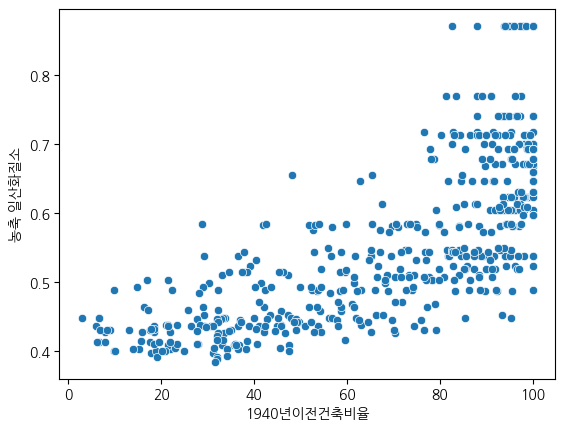

In [10]:
sns.scatterplot(data=data['농축 일산화질소'], x=data['1940년이전건축비율'], y=data['농축 일산화질소'])

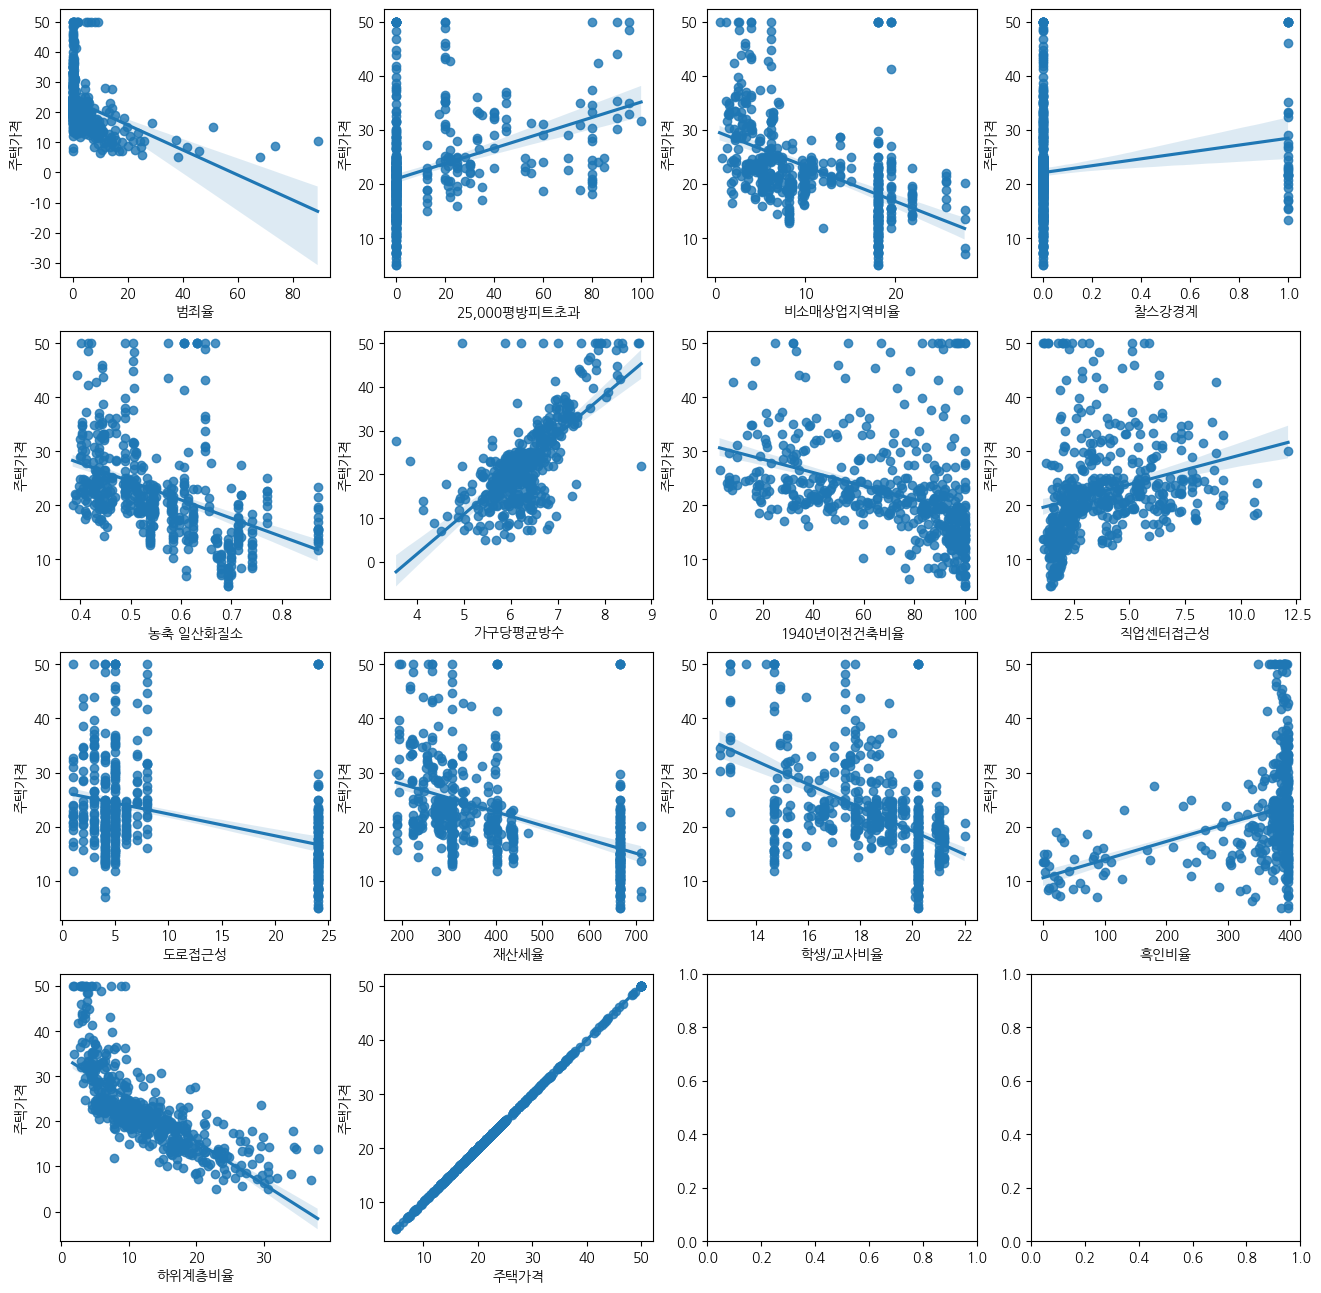

In [11]:
# 주택가격에 대한 각 독립변수의 산포도 그래프
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4)
for i , feature in enumerate(data):
    row = int(i/4)
    col = i%4
    sns.regplot(data=data, x=feature, y='주택가격', ax=axs[row][col])

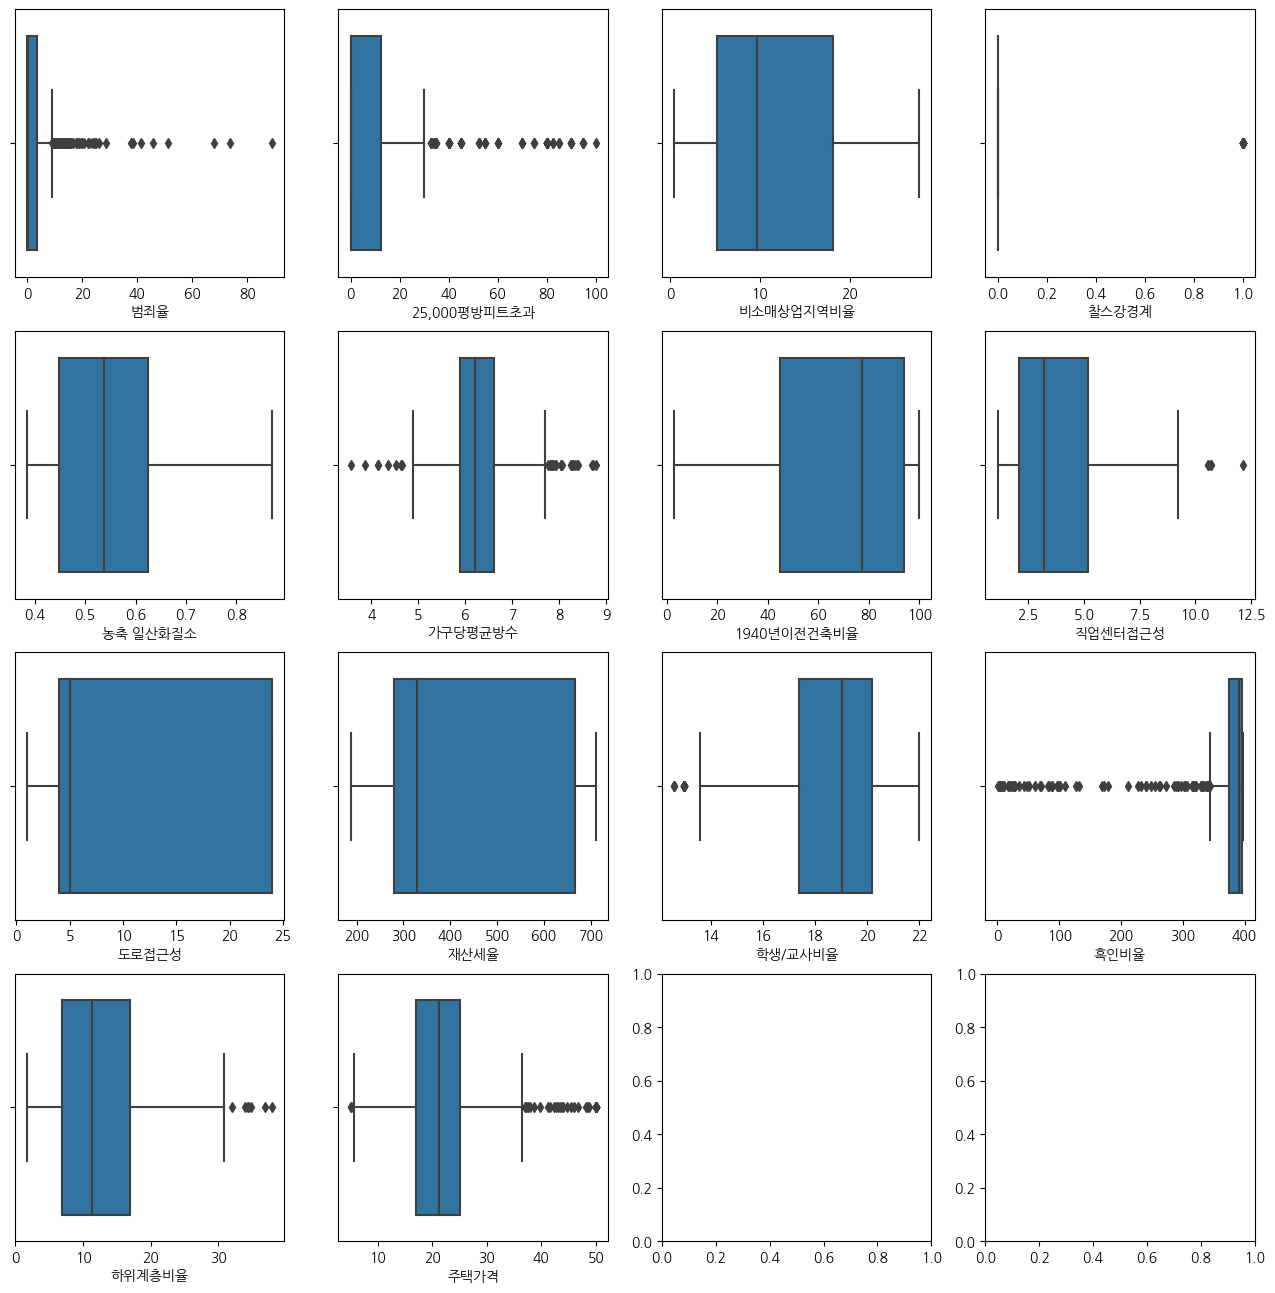

In [12]:
# 주택가격에 대한 각 독립변수의 산포도 그래프
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4)
for i , feature in enumerate(data):
    row = int(i/4)
    col = i%4
    sns.boxplot(x=data[feature], ax=axs[row][col])

* 독립변수에 이상치가 많은 컬럼이 많으므로 로버스트 스케일러를 이용해서 스케일링

In [13]:
data.head(2)

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [14]:
X = data.drop('주택가격', axis=1)
y = data['주택가격']

In [15]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_scaled = rs.fit_transform(X)

In [16]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
X_scaled

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 7)

# 사이킷런의 회귀분석

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('coef: ', lr.coef_)
print('intercept: ', lr.intercept_)
print('mse: ', mean_squared_error(y_test, pred))
print('rmse: ', sqrt(mean_squared_error(y_test, pred)))
print('R-squared: ', r2_score(y_test, pred))      

coef:  [-0.44811816  0.38091882  0.28142521  2.79225761 -2.66236681  3.89109958
 -0.54238383 -3.93198683  5.31609421 -4.45216524 -2.57479921  0.21186124
 -3.899069  ]
intercept:  22.90779340154933
mse:  34.05648134887459
rmse:  5.835793120808395
R-squared:  0.5785415472763411


In [21]:
len(X_test)

102

In [22]:
len( y_test)

102

In [23]:
len(X_test)

102

In [24]:
len(pred)

102

ValueError: x and y must be the same size

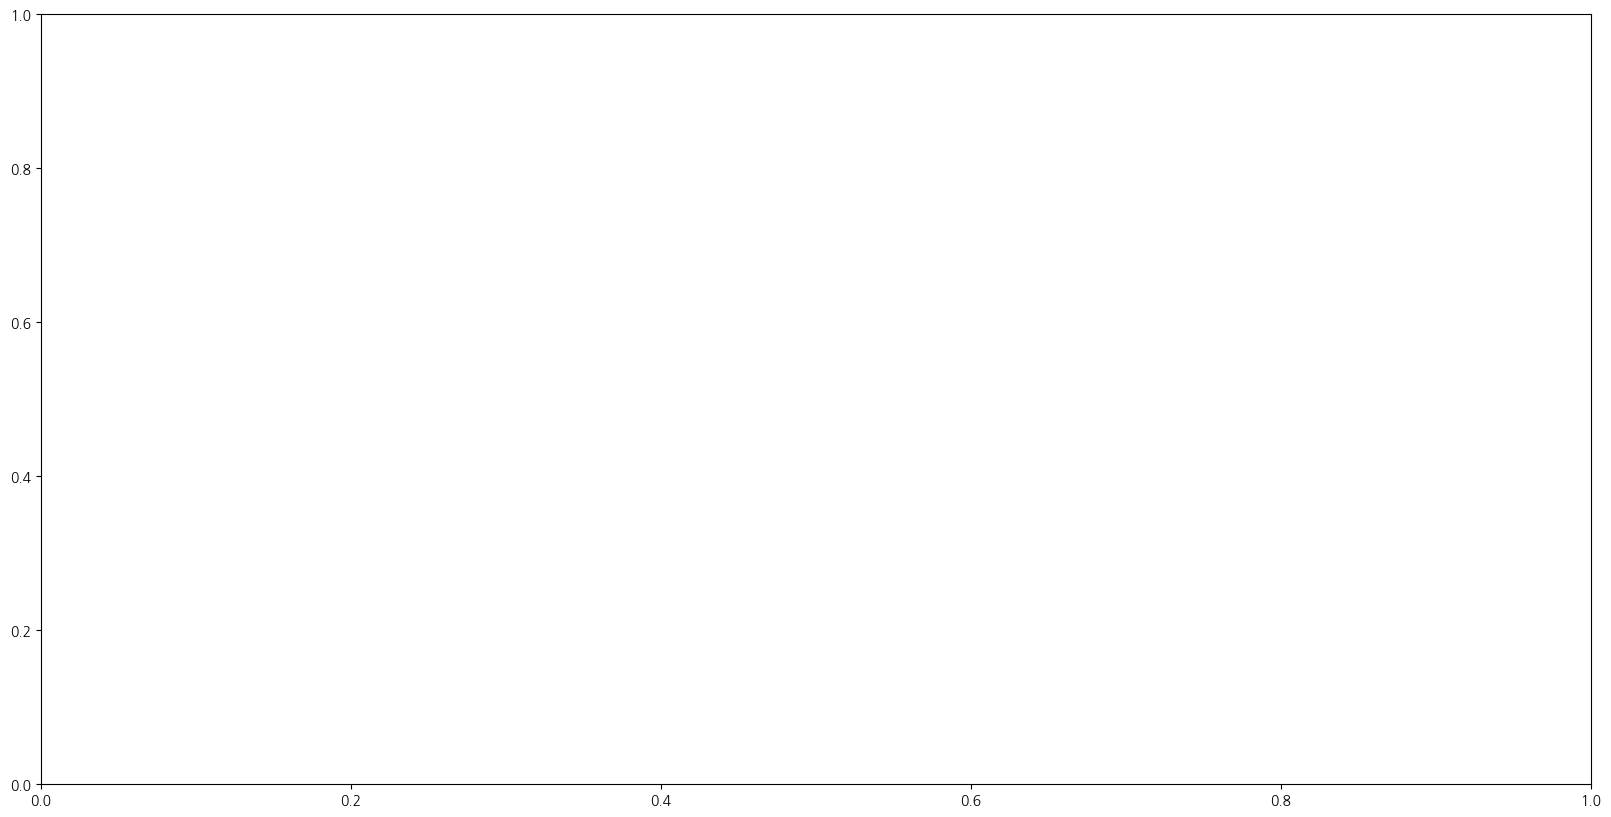

In [25]:
plt.figure(figsize=(20,10))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [26]:
result = pd.DataFrame({'실제값': y_test, "예측값": pred})
result

,실제값,예측값
357,21.7,23.016076
337,18.5,19.175452
327,22.2,19.931333
13,20.4,19.192223
418,8.8,4.733661
...,...,...
413,16.3,9.805358
408,17.2,13.675562
80,28.0,28.487892
451,15.2,20.270360


In [27]:
import statsmodels.api as sm

In [28]:
ols = sm.OLS(y_train, X_train)
model = ols.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   주택가격   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              48.84
Date:                Fri, 20 Oct 2023   Prob (F-statistic):                    1.37e-73
Time:                        11:32:39   Log-Likelihood:                         -1668.1
No. Observations:                 404   AIC:                                      3362.
Df Residuals:                     391   BIC:                                      3414.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# 릿지 회귀분석(Ridge Regression)
* L2규제, w(가중치)의 절대값을 가능한 한 작게 만들어 0에 가깝게 만든다.
* 모든 특성(Feature, 독립변수)이 주는 영향력을 최소화

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
pred2 = ridge.predict(X_test)
print('coef: ', ridge.coef_)
print('intercept: ', ridge.intercept_)
print('mse: ', mean_squared_error(y_test, pred2))
print('rmse: ', sqrt(mean_squared_error(y_test, pred2)))
print('R-squared: ', r2_score(y_test, pred2))   

coef:  [-0.43695105  0.36204928  0.1102694   2.76112827 -2.55323409  3.92371235
 -0.55838402 -3.86042291  4.61349395 -3.77318081 -2.53778791  0.21172457
 -3.86189886]
intercept:  22.928047961074952
mse:  34.29618318798121
rmse:  5.8562943221785915
R-squared:  0.575575170180892


In [30]:
for alpha in [0, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    pred2 = ridge.predict(X_test)
    print("alpha: ", alpha)
    print("-"*50)
    print('coef: ', ridge.coef_)
    print('intercept: ', ridge.intercept_)
    print('mse: ', mean_squared_error(y_test, pred2))
    print('rmse: ', sqrt(mean_squared_error(y_test, pred2)))
    print('R-squared: ', r2_score(y_test, pred2))  
    print(alpha, f"훈련 세트 점수: {ridge.score(X_train, y_train)} ")
    print(alpha, f"테스트 세트 점수: {ridge.score(X_test, y_test)} ")
    print()

alpha:  0
--------------------------------------------------
coef:  [-0.44811816  0.38091882  0.28142521  2.79225761 -2.66236681  3.89109958
 -0.54238383 -3.93198683  5.31609421 -4.45216524 -2.57479921  0.21186124
 -3.899069  ]
intercept:  22.90779340154933
mse:  34.05648134887465
rmse:  5.8357931208084
R-squared:  0.5785415472763403
0 훈련 세트 점수: 0.7698532963729757 
0 테스트 세트 점수: 0.5785415472763403 

alpha:  0.1
--------------------------------------------------
coef:  [-0.44684005  0.37879135  0.26137353  2.79008099 -2.65073915  3.89473775
 -0.5443916  -3.92491877  5.23541364 -4.37326459 -2.57073537  0.21182976
 -3.89512865]
intercept:  22.9101125154965
mse:  34.081827791997796
rmse:  5.837964353436718
R-squared:  0.5782278779752961
0.1 훈련 세트 점수: 0.7698508329309773 
0.1 테스트 세트 점수: 0.5782278779752961 

alpha:  1
--------------------------------------------------
coef:  [-0.43695105  0.36204928  0.1102694   2.76112827 -2.55323409  3.92371235
 -0.55838402 -3.86042291  4.61349395 -3.7731808

## Lasso(라쏘, L1규제)
* w(가중치)의 절대값에 패널티를 부여해서 0으로 만들고 제거
* 특성(feature, 독립변수)이 너무 많을 때 유용

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
pred2 = lasso.predict(X_test)
print('coef: ', lasso.coef_)
print('intercept: ', lasso.intercept_)
print('mse: ', mean_squared_error(y_test, pred2))
print('rmse: ', sqrt(mean_squared_error(y_test, pred2)))
print('R-squared: ', r2_score(y_test, pred2))  
print(alpha, f"훈련 세트 점수: {lasso.score(X_train, y_train)} ")
print(alpha, f"테스트 세트 점수: {lasso.score(X_test, y_test)} ")

coef:  [-0.44924038  0.01910541 -0.          0.         -0.          4.49033756
 -0.         -0.         -0.         -0.         -1.08680653  0.2917393
 -1.94742591]
intercept:  22.98810486022828
mse:  45.22996794500432
rmse:  6.72532288778794
R-squared:  0.44026653512541625
100 훈련 세트 점수: 0.6928716917521303 
100 테스트 세트 점수: 0.44026653512541625 


## ElasticNet(엘라스틱넷 회귀분석)

In [33]:
from sklearn.linear_model import ElasticNet
el_net = ElasticNet()
el_net.fit(X_train, y_train)
pred2 = el_net.predict(X_test)
print('coef: ', el_net.coef_)
print('intercept: ', el_net.intercept_)
print('mse: ', mean_squared_error(y_test, pred2))
print('rmse: ', sqrt(mean_squared_error(y_test, pred2)))
print('R-squared: ', r2_score(y_test, pred2))  
print(alpha, f"훈련 세트 점수: {el_net.score(X_train, y_train)} ")
print(alpha, f"테스트 세트 점수: {el_net.score(X_test, y_test)} ")

coef:  [-0.56280634  0.30242972 -0.02071502  0.         -0.03168404  3.12921805
 -0.         -0.         -0.         -0.         -1.19226235  0.31400883
 -1.77231844]
intercept:  22.93406535779871
mse:  42.89934748180562
rmse:  6.549759345335187
R-squared:  0.4691086132086908
100 훈련 세트 점수: 0.6505728229705883 
100 테스트 세트 점수: 0.4691086132086908 
